# Visualização de Dados - Seaborn

Este notebook apresentas conceitos básicos de visualização de dados com ênfase na biblioteca [Seaborn](https://seaborn.pydata.org/).

## Leitura e análise inicial dos dados


In [1]:
# Importação de Bibliotecas
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# lê o arquivo CSV
df = pd.read_csv('../data/aluguel.csv')
df['data'] = pd.to_datetime(df['data'], format='%d/%m/%y')
df = df.sort_values('data')

Vamos utilizar um dataset de ofertas de aluguel. O primeiro passo ao se analisar dados desconhecidos é visualizar algumas linhas de dados:

In [2]:
df.head(10)

,codigo,endereco,quartos,suite,area,vaga,aluguel,condominio,data
7,469,Rua Desembargador Westphalen,1,0,30,0,550,210,2017-07-03
1,167,Rua Jose Loureiro,2,0,64,0,650,428,2017-07-15
10,9850,Avenida Visconde de Guarapuava,1,0,64,1,600,326,2017-07-15
19,44803,Rua Rockefeller,2,0,77,1,950,200,2017-07-19
12,20802,Avenida Sete de Setembro,1,0,47,0,600,405,2017-07-27
4,2970,Rua Lourenço Pinto,2,0,63,0,1300,300,2017-08-05
16,80,Rua Desembargador Westphalen,1,0,80,1,900,350,2017-08-12
13,568,Rua Alferes Poli,1,0,43,0,600,330,2017-08-12
2,6784,Rua Jose Loureiro,2,0,81,0,1100,400,2017-08-23
17,66490,Rua Desembargador Westphalen,1,0,80,1,1100,350,2017-08-29


Vamos usar em alguns exemplos um DataFrame com os valores de condomínio e aluguel agregados por mês da oferta:

In [3]:
df_mensal = df.groupby(df.data.dt.to_period("M"))[['aluguel', 'condominio']].mean().reset_index()
df_mensal['data'] = df_mensal['data'].dt.to_timestamp()
df_mensal = df_mensal.set_index('data')
df_mensal

,aluguel,condominio
data,,
2017-07-01,670.0,313.8
2017-08-01,1000.0,346.0
2017-09-01,942.0,269.4
2017-10-01,980.0,414.2


## Seaborn - Conceitos principais

A biblioteca Seaborn é baseada no matplotlib e se integra à estrutura de DataFrames do Pandas. As principais vantagens no uso do Seaborn são:

- Recursos para a criação de múltiplas plotagens baseadas em variáveis categóricas
- Recursos para avaliação de relacionamentos entre variáveis
- Controle de estilo simplificado

Os exemplos abaixo demonstram diversos desses recursos.

In [4]:
# Importando as bibliotecas
import seaborn as sns
import matplotlib.pyplot as plt

# Aplicando configurações de estilo padrão (tema, escala e cores)
sns.set()

### Plotagens por categoria

O Seaborn simplifica a criação de plotagens mostrando dados separados por categoria. No exemplo abaixo exibimos as contagens de apartamentos por quarto e usamos as cores (hue) para indicar os que têm e não têm suítes.

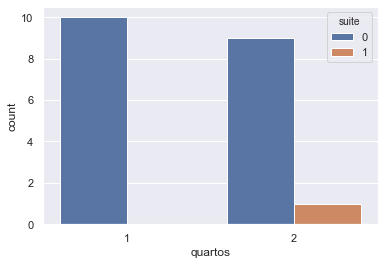

In [5]:
ax = sns.countplot(x="quartos", hue="suite", data=df)

Podemos incluir ainda mais categorias na visualização. Por exemplo, podemos incluir a informação de número de vagas e exibir a separação em colunas (col) diferentes da figura:

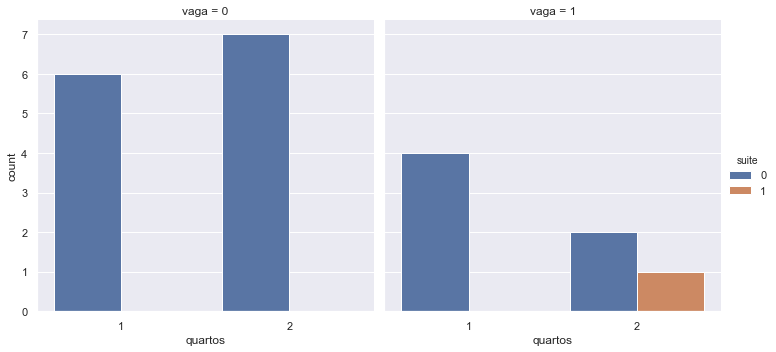

In [6]:
ax = sns.catplot(x="quartos", hue="suite", 
                 col = "vaga", kind="count", data=df)

### Salvando a figura em um arquivo

Para salvar a figura em um arquivo, use o método `savefig()` definindo o tipo no nome do arquivo (neste caso SVG):

In [7]:
ax.savefig("apartamentos.svg")

## Séries temporais

Séries temporais são tipicamente exibidas como gráficos de linhas com as datas no eixo x. Abaixo exibimos os dados de apartamentos usando como variável temporal a data da oferta (que não é muito útil para análise de evolução temporal mas é suficiente para nossos exemplos).

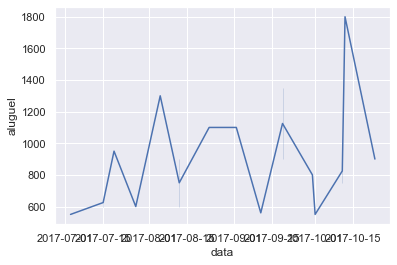

In [8]:
sns.lineplot(x="data", y='aluguel', data=df)

Abaixo configuramos diversas opções da figura, como tamanho, rótulos e limite do eixo:

(0, 2000)

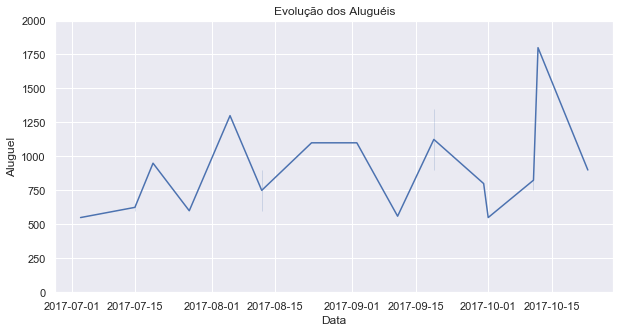

In [9]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x="data", y='aluguel', data=df)
plt.xlabel("Data")
plt.ylabel("Aluguel")
plt.title("Evolução dos Aluguéis")
plt.ylim(0,2000)

Também é possível separar os valores por categoria. Abaixo exibimos os valores de aluguel ao longo do tempo separados por número de vagas.

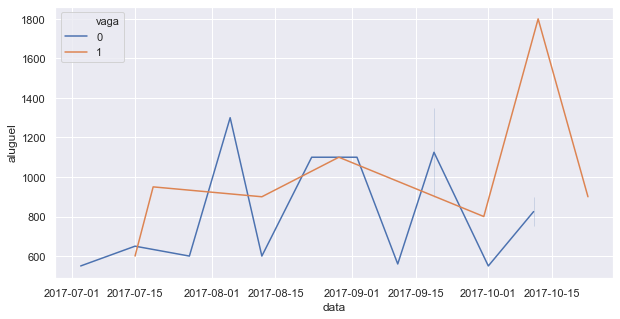

In [10]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x="data", y='aluguel', hue="vaga", data=df)

E podemos incluir ainda mais categorias, separando agora por número de quatos usando o estilo de linha.

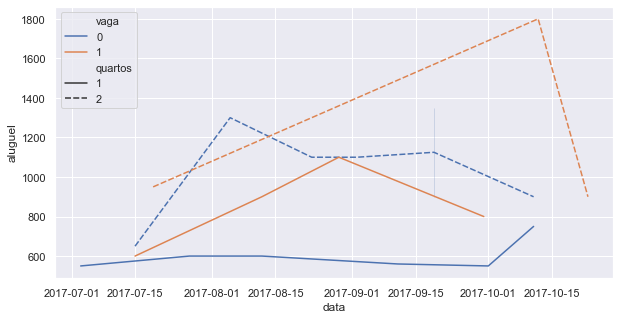

In [11]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(x="data", y='aluguel', hue="vaga", style ='quartos', data=df)

Para mostrar mais de uma variável, uma forma conveniente é ter os valores do eixo x como índice do DataFrame e os valores das linhas em cada um das colunas (como no DataFrame `df_mensal` definido acima).

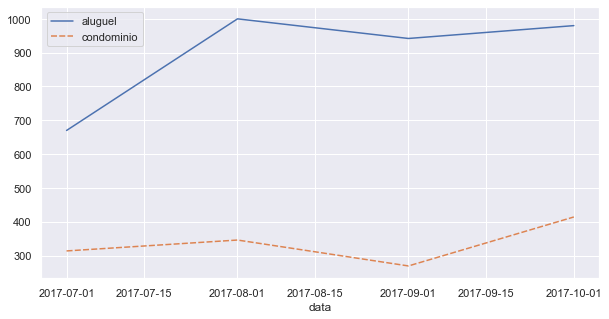

In [12]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.lineplot(data=df_mensal)

## Ranqueamento

Para mostrar o ranqueamento de valores, podemos usar um gráfico de barras. No Seaborn é preciso passar um parâmetro indicando a ordem dos valores exibidos:

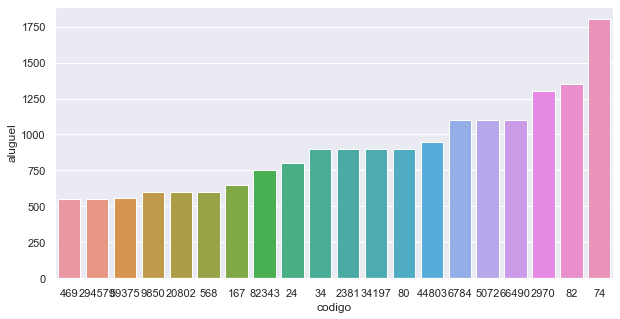

In [13]:
fig, ax = plt.subplots(figsize=(10, 5))

ordem = df.sort_values('aluguel')['codigo']
ax = sns.barplot(x="codigo", y="aluguel", order=ordem, data=df)

Podemos mudar a paleta de cores usada:

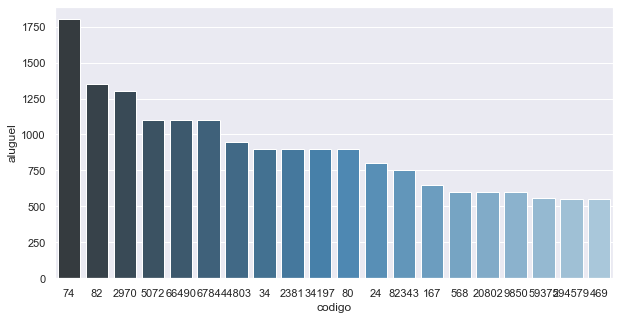

In [14]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(x="codigo", y="aluguel", palette="Blues_d", order=df.sort_values('aluguel', ascending=False)['codigo'], data=df)

Ou definir uma única cor (mais recomendado neste caso):

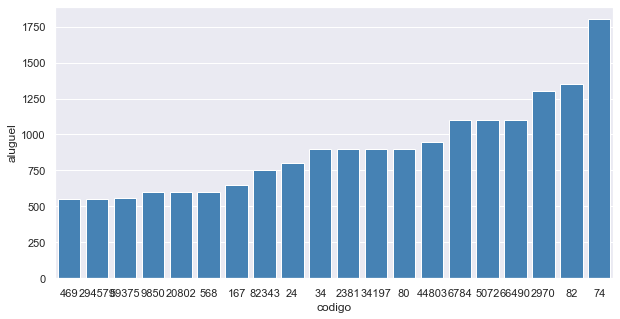

In [15]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = sns.barplot(x="codigo", y="aluguel", facecolor='steelblue', order=df.sort_values('aluguel')['codigo'], data=df)

## Parte de um todo

O Seaborn não provê bons métodos para demonstrar partes de um todo na mesma visualização. Os exemplos abaixo mostram algumas opções usando o matplotlib/pandas.

Gráfico de pizza mostrando quantidade de apartamentos por número de vagas:

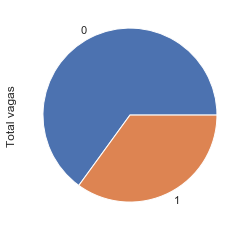

In [16]:
df_vagas = df.groupby('vaga').size().rename('Total vagas')
df_vagas.plot.pie()

Gráfico de barras empilhadas agregando o valor do condomínio e aluguel para cada oferta:

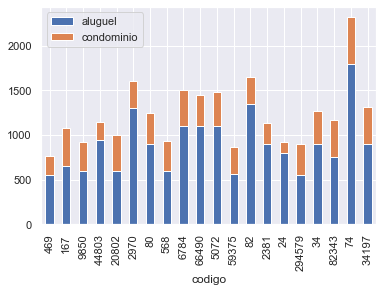

In [17]:
df.set_index('codigo')[['aluguel', 'condominio']].plot(kind='bar', stacked=True)

Gráfico de área mostrando a evolução dos preços de aluguel com condomínio ao longo do tempo:

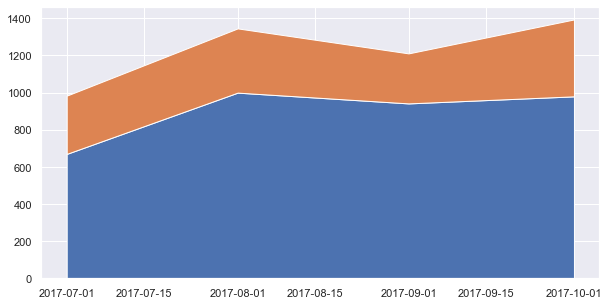

In [18]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.stackplot(df_mensal.index, df_mensal.T)

## Distribuição

O Seaborn possui diversos recursos úteis para visualizar distribuição de variáveis.

Plotagem de histograma com curva KDE:

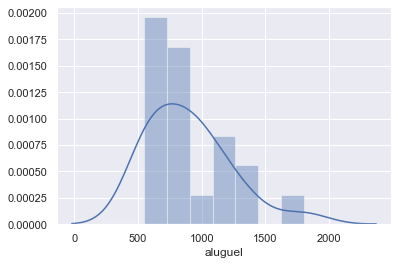

In [19]:
sns.distplot(df['aluguel'], bins=7);

Curva KDE com instâncias no rodapé:

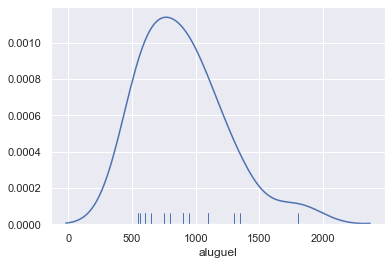

In [20]:
sns.distplot(df['aluguel'], hist=False, rug=True);

Scatterplot com histogramas das variáveis integrados:

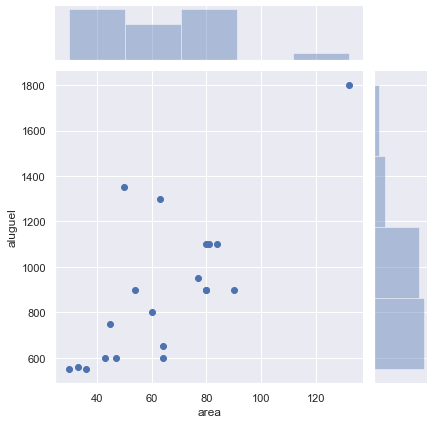

In [21]:
sns.jointplot(x="area", y="aluguel", data=df);

Plotagem de instâncias por categoria:

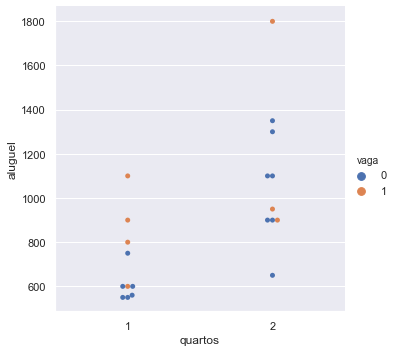

In [22]:
sns.catplot(x="quartos", y="aluguel", hue="vaga",
            kind="swarm", data=df);

Violin plots:

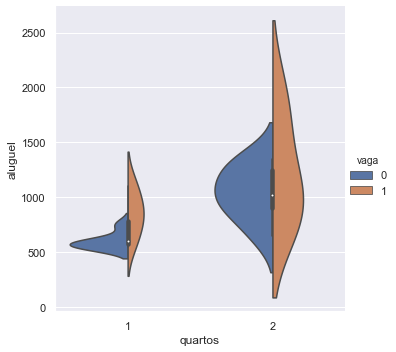

In [23]:
sns.catplot(x="quartos", y="aluguel", hue="vaga",
            kind="violin", split = True, data=df);

## Correlação

Os recursos do Seaborn para análise de correlação também são muito poderosos.

Começando por um gráfico de Scatterplot simples:

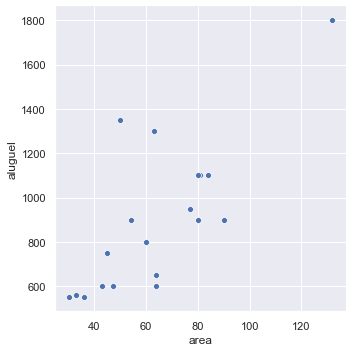

In [24]:
sns.relplot(x="area", y="aluguel", data=df);

É possível incluir uma reta de regressão para estimar o relacionamento linear entre as variáveis:

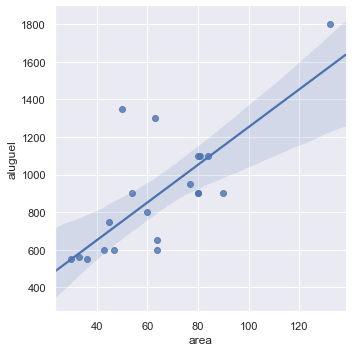

In [25]:
sns.lmplot(x="area", y="aluguel", data=df);

A construção de heatmaps para exibição de correlações é muito rica:

In [26]:
df_corr = df[['area', 'quartos', 'vaga', 'aluguel', 'condominio']].corr()
df_corr

,area,quartos,vaga,aluguel,condominio
area,1.000000,0.542466,0.533035,0.748196,0.466627
quartos,0.542466,1.000000,-0.104828,0.619797,0.214173
vaga,0.533035,-0.104828,1.000000,0.251974,-0.087415
aluguel,0.748196,0.619797,0.251974,1.000000,0.302494
condominio,0.466627,0.214173,-0.087415,0.302494,1.000000


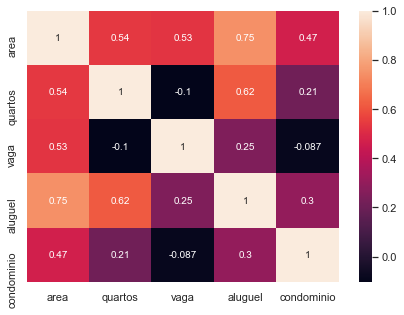

In [27]:
fig, ax = plt.subplots(figsize=(7, 5))

hm = sns.heatmap(df_corr, ax = ax, annot=True)

Configurando a paleta de cores e outras opções de exibição:

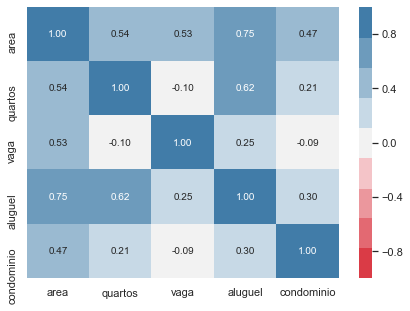

In [28]:
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(df_corr, cmap=sns.diverging_palette(10, 240, n=9), center = 0, annot=True, fmt=".2f", vmin =-1, vmax=1)

O Seaborn também permite a construção de dendogramas para identificação de clusters entre as observações. No exemplo abaixo buscamos identificar agrupamentos entre as ofertas de apartamentos:

In [29]:
df_corr_aps = df[['quartos', 'vaga', 'aluguel', 'condominio', 'codigo']].set_index('codigo').T.corr()
df_corr_aps.head()

codigo,469,167,9850,44803,20802,2970,80,568,6784,66490,5072,59375,82,2381,24,294579,34,82343,74,34197
codigo,,,,,,,,,,,,,,,,,,,,
469,1.000000,0.960835,0.985986,0.983553,0.956326,0.987265,0.999972,0.984775,0.999814,0.997721,0.999329,0.985705,0.985804,0.992538,0.970395,0.966421,0.999488,0.982962,0.995150,0.997023
167,0.960835,1.000000,0.993598,0.894979,0.999874,0.904512,0.962844,0.994379,0.955317,0.939949,0.950041,0.993789,0.900667,0.919875,0.865459,0.999781,0.969211,0.995401,0.928917,0.979341
9850,0.985986,0.993598,1.000000,0.939640,0.991687,0.946890,0.987187,0.999974,0.982589,0.972487,0.979215,0.999997,0.943980,0.958287,0.916508,0.995745,0.990819,0.999851,0.964797,0.995914
44803,0.983553,0.894979,0.939640,1.000000,0.887803,0.999761,0.982198,0.937180,0.986851,0.993497,0.989508,0.939063,0.999917,0.998237,0.998059,0.904114,0.977269,0.933597,0.996549,0.966698
20802,0.956326,0.999874,0.991687,0.887803,1.000000,0.897646,0.958449,0.992578,0.950517,0.934428,0.944980,0.991903,0.893673,0.913549,0.857419,0.999325,0.965190,0.993760,0.922938,0.976018


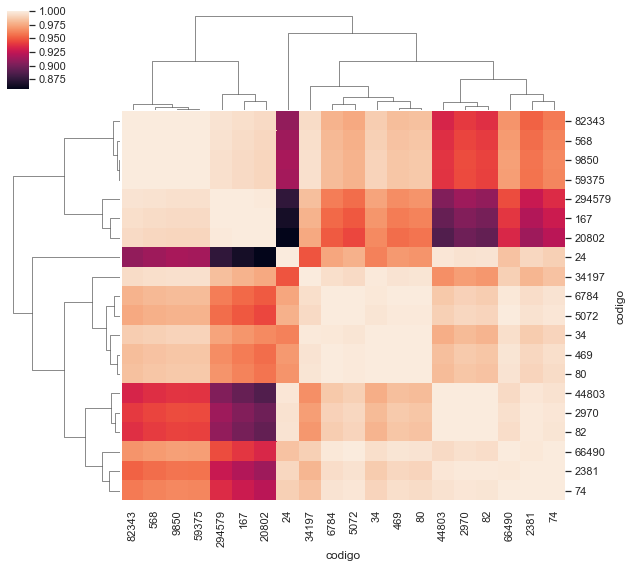

In [30]:
cm = sns.clustermap(df_corr_aps, figsize=(10,9), 
               col_cluster=True, annot=False)

## Comparação Nominal

Gráficos de barras podem ser usados para a comparação direta de valores. Os exemplos abaixo mostram algumas opções:

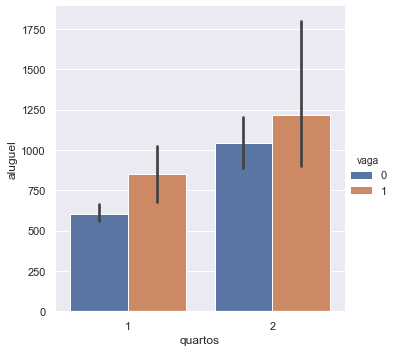

In [31]:
sns.catplot(x="quartos", y="aluguel", hue="vaga", kind="bar", data=df);

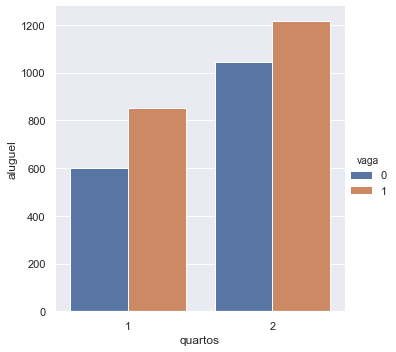

In [32]:
sns.catplot(x="quartos", y="aluguel", hue="vaga", kind="bar", ci=None, data=df);

## Ajustando estilos

O Seaborn simplifica o ajuste de estilos aplicados aos gráficos gerados. Estilos de cores dos elementos, fontes e tipos de linhas podem ser alterados com o método `set_style`:

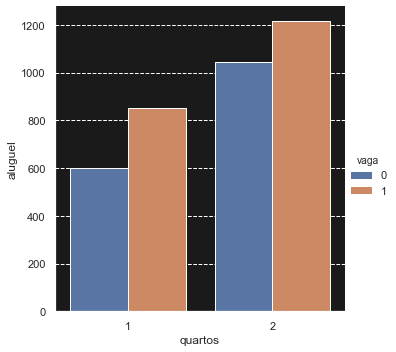

In [33]:
sns.set_style("dark", 
              {"axes.facecolor": ".1", 
               'axes.grid': True, 'grid.linestyle': '--'})
cp = sns.catplot(x="quartos", y="aluguel", hue="vaga",
            kind="bar", ci=None, data=df)

Para alterar fontes de forma a produzir gráficos adequados para cada tipo de contexto, é possível usar o método `set_context`. As opções possíveis são ` “notebook”, “paper”, “talk”, “poster”`

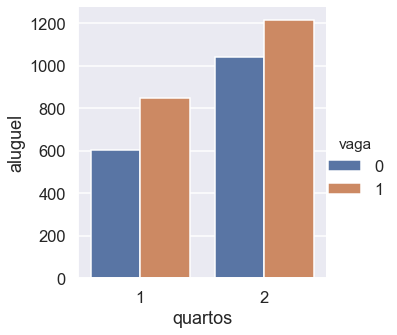

In [34]:
sns.set()
sns.set_context("talk")
cp = sns.catplot(x="quartos", y="aluguel", 
                 hue="vaga", kind="bar", ci=None, data=df)

## Infográficos

Para criar infográficos, você pode editar um gráfico salvo como SVG usando seu editor vetorial favorito. 

![Infográfico](img/apartamentos.png)

### Referências

- Documentção do Seaborn: [Tutorial](https://seaborn.pydata.org/tutorial.html)
